<a href="https://colab.research.google.com/github/gabby-tuff/GT_Portfolio/blob/main/GANs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GANs

Generalised adversarial networks are a machine learning tool that has two neural networks competing against each other in a zero sum game (whenever one wins, the other losses). The two neural networks competing in this game are the generator and the discriminator.

- Generator: this neural network is trained by a set of data then latent data is inputted into the generator which new data is generator from. Set of all probability measures $\Omega$ on the generated data $\mu_G$.
- Discriminator: this neural network is a set of markov kernals and classes the data passed into it as generated or reference (real) data. $\mu_D : Ω \rightarrow P[0,1]$.

The objective function of the game is the following:
$$L(\mu_G, \mu_D) = E_{x \sim \mu_{ref}, y \sim \mu_D(x)}[\ln y] + E_{x \sim \mu_{G}, y \sim \mu_D(x)}[\ln (1-y)].$$

The discriminator aims to maximise the function (e.g. the expectation of the probability of $\mu_{ref} > \mu_D$. The generator aims to minimise the function.

How to code:
- Install pytorch
- Get the relevent training data and transform if necessary
- Batch the data into subsets to train the generator
- Create and initialise the discriminator
- Create and initialise the generator
- Initialise the parameters (Epochs (number of times the training data passes through the model)
- Choose a loss function (measures the difference between the real data and generated data)
- Train the discriminator against the generator using an optimiser algorithm (used to minimise the loss function by tuning the parameters) and vice versa
- Create a training loop so that the training samples are fed into the model and weights updated (this is done for the number of epochs)
- Get a random sample from the latent space and use it to generate new values

# Simple Sine gan


In [ ]:
# Install the necessary package
import torch
from torch import nn

import math
import matplotlib.pyplot as plt

In [ ]:
# Set seed for training purposes
torch.manual_seed(23)

In [ ]:
# Generate training data pairs (x1, x2) from the sine graph
train_data_length = 1024
train_data = torch.zeros((train_data_length, 2))
train_data[:, 0] = 2 * math.pi * torch.rand(train_data_length)
train_data[:, 1] = torch.sin(train_data[:, 0])
train_labels = torch.zeros(train_data_length)
train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)
]

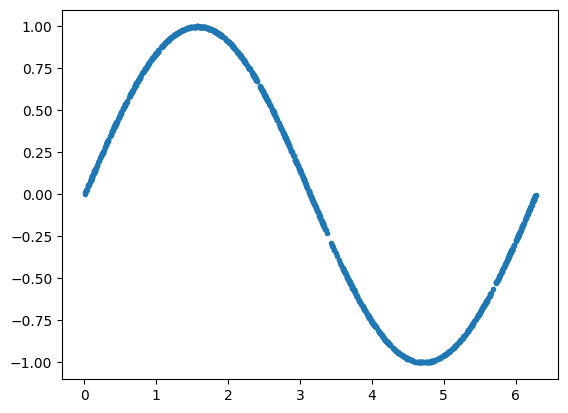

In [ ]:
## Visulaise the synthetic data
plt.plot(train_data[:, 0], train_data[:, 1], ".")

In [ ]:
# Batch the data into 32 to return subsets that will be used to generate the data
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

In [ ]:
# Code to create discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        output = self.model(x)
        return output

# initialise discriminator
discriminator = Discriminator()

In [ ]:
# Code to create generator
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 2),
        )

    def forward(self, x):
        output = self.model(x)
        return output

# Initialise generator
generator = Generator()

In [ ]:
# Parameter set-up
lr = 0.001
num_epochs = 300
# Binary cross-entropy used for loss function
loss_function = nn.BCELoss()

In [ ]:
# Train the discriminator against generator using the adam algorithm (and vice versa)
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [ ]:
# Create training loop so that training samples are fed into the model and the weights are updated
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 2))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss
        if epoch % 10 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")

Epoch: 0 Loss D.: 0.20570871233940125
Epoch: 0 Loss G.: 2.6403326988220215
Epoch: 10 Loss D.: 0.7119399309158325
Epoch: 10 Loss G.: 0.8901814818382263
Epoch: 20 Loss D.: 0.6420423984527588
Epoch: 20 Loss G.: 0.9110629558563232
Epoch: 30 Loss D.: 0.7069824934005737
Epoch: 30 Loss G.: 0.7225701808929443
Epoch: 40 Loss D.: 0.6482347249984741
Epoch: 40 Loss G.: 0.7407731413841248
Epoch: 50 Loss D.: 0.6428158283233643
Epoch: 50 Loss G.: 1.0042279958724976
Epoch: 60 Loss D.: 0.6705783009529114
Epoch: 60 Loss G.: 0.6897067427635193
Epoch: 70 Loss D.: 0.6696486473083496
Epoch: 70 Loss G.: 0.6757386326789856
Epoch: 80 Loss D.: 0.645726203918457
Epoch: 80 Loss G.: 0.9986507892608643
Epoch: 90 Loss D.: 0.663291335105896
Epoch: 90 Loss G.: 0.7706455588340759
Epoch: 100 Loss D.: 0.6618689298629761
Epoch: 100 Loss G.: 0.7517943382263184
Epoch: 110 Loss D.: 0.7020581364631653
Epoch: 110 Loss G.: 0.8344260454177856
Epoch: 120 Loss D.: 0.6905636787414551
Epoch: 120 Loss G.: 0.6624332666397095
Epoch: 13

In [ ]:
# Get random samples from latent space and generator a sample based on this using the generator
latent_space_samples = torch.randn(100, 2)
generated_samples = generator(latent_space_samples)

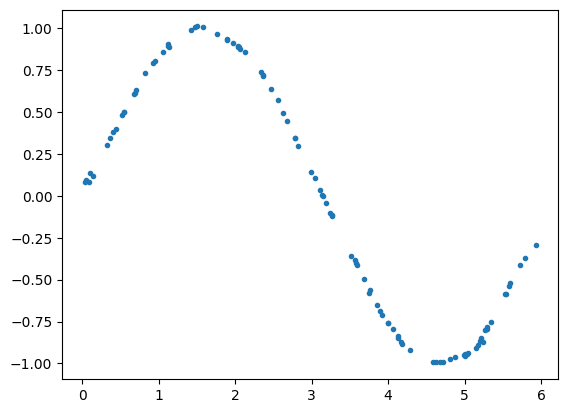

In [ ]:
# Check if the generatored data matches the ref (by eye)
generated_samples = generated_samples.detach()
plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")

# Generating handwritten digets

In [ ]:
# import the dataset
import torch
from torch import nn

import math
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms

In [ ]:
# set the seed
torch.manual_seed(12)

In [ ]:
# Point to cpu/gpu
device = ""
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

In [ ]:
# Prepare the training data
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]
)

In [ ]:
# Load the data and perform transformations
train_set = torchvision.datasets.MNIST(
    root=".", train=True, download=True, transform=transform
)

100%|██████████| 9912422/9912422 [00:00<00:00, 259669672.38it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 75099624.19it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 136637190.49it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 11637464.12it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [ ]:
# Create the data loader
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

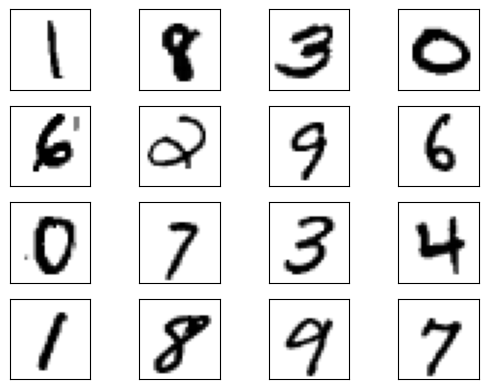

In [ ]:
# Plot the training data
real_samples, mnist_labels = next(iter(train_loader))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(real_samples[i].reshape(28, 28), cmap="gray_r")
    plt.xticks([])
    plt.yticks([])

In [ ]:
# Discriminator set-up (neural network using relu and linear activation)
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 1024), # bewteen 784 and 1024 neurons
            nn.ReLU(),
            nn.Dropout(0.3), # to reduce bias
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = x.view(x.size(0), 784)
        output = self.model(x)
        return output

discriminator = Discriminator().to(device=device)

In [ ]:
# Generator set-up tanh used as activation for output layer as needed on 1 -1
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )

    def forward(self, x):
        output = self.model(x)
        output = output.view(x.size(0), 1, 28, 28)
        return output

generator = Generator().to(device=device)

In [ ]:
# define the training parameters and optimise using adam
lr = 0.0001
num_epochs = 50
loss_function = nn.BCELoss()

optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [ ]:
# Training loop
for epoch in range(num_epochs):
    for n, (real_samples, mnist_labels) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples = real_samples.to(device=device)
        real_samples_labels = torch.ones((batch_size, 1)).to(
            device=device
        )
        latent_space_samples = torch.randn((batch_size, 100)).to(
            device=device
        )
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1)).to(
            device=device
        )
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels
        )
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 100)).to(
            device=device
        )

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss
        if n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")

Epoch: 0 Loss D.: 0.5689147114753723
Epoch: 0 Loss G.: 0.4842390716075897
Epoch: 1 Loss D.: 0.0413590632379055
Epoch: 1 Loss G.: 5.119352340698242
Epoch: 2 Loss D.: 0.0018850744236260653
Epoch: 2 Loss G.: 6.403529644012451
Epoch: 3 Loss D.: 0.06654837727546692
Epoch: 3 Loss G.: 5.092119216918945
Epoch: 4 Loss D.: 0.08165363222360611
Epoch: 4 Loss G.: 6.575775623321533
Epoch: 5 Loss D.: 0.18728411197662354
Epoch: 5 Loss G.: 2.9048686027526855
Epoch: 6 Loss D.: 0.11415080726146698
Epoch: 6 Loss G.: 2.3026790618896484
Epoch: 7 Loss D.: 0.20128202438354492
Epoch: 7 Loss G.: 2.3070404529571533
Epoch: 8 Loss D.: 0.42819491028785706
Epoch: 8 Loss G.: 2.3540475368499756
Epoch: 9 Loss D.: 0.2783609926700592
Epoch: 9 Loss G.: 2.1066226959228516
Epoch: 10 Loss D.: 0.3647056818008423
Epoch: 10 Loss G.: 2.0064122676849365
Epoch: 11 Loss D.: 0.4270166754722595
Epoch: 11 Loss G.: 1.6306333541870117
Epoch: 12 Loss D.: 0.3821357190608978
Epoch: 12 Loss G.: 1.693372130393982
Epoch: 13 Loss D.: 0.4025974

KeyboardInterrupt: 

In [ ]:
# Get values from the latent space and feed them to the generator
latent_space_samples = torch.randn(batch_size, 100).to(device=device)
generated_samples = generator(latent_space_samples)

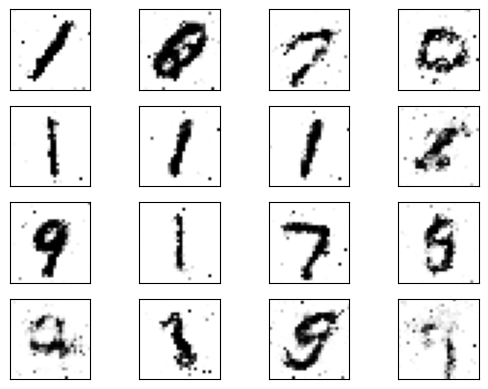

In [ ]:
# Output the generated samples
generated_samples = generated_samples.cpu().detach()
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(generated_samples[i].reshape(28, 28), cmap="gray_r")
    plt.xticks([])
    plt.yticks([])